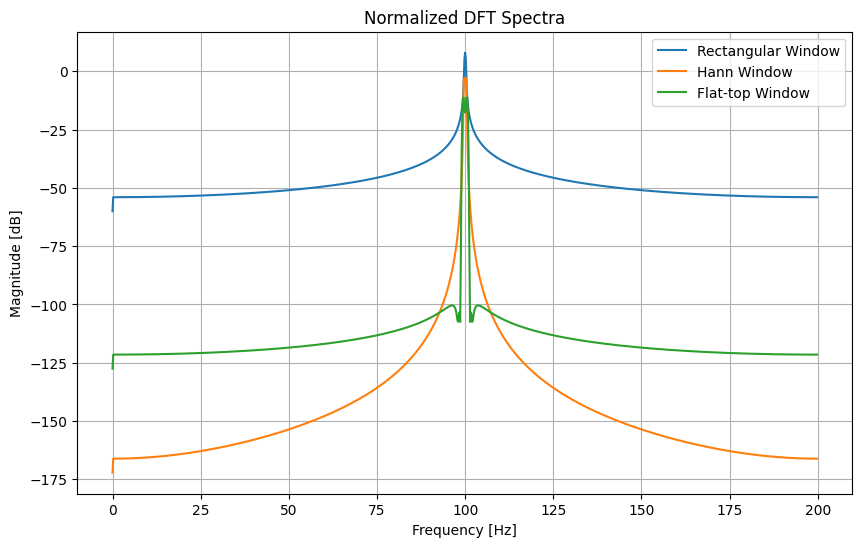

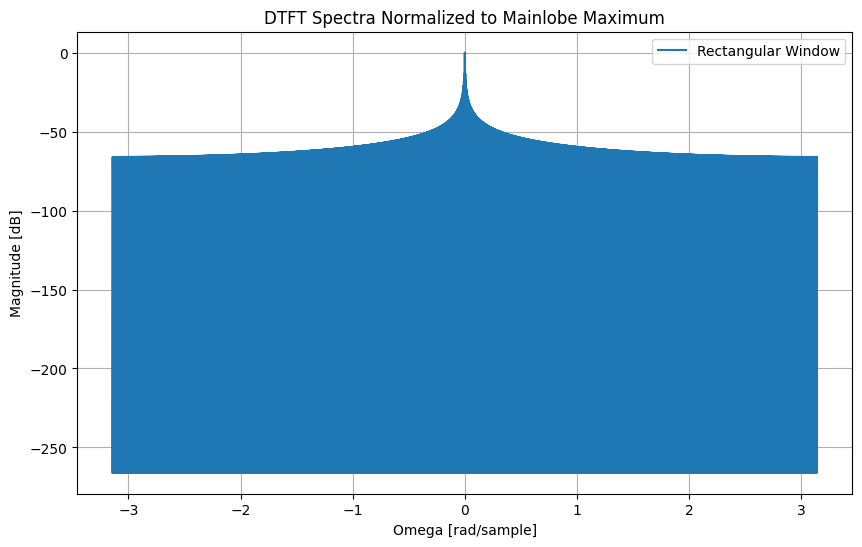

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from scipy.signal.windows import hann, flattop

# Input data
f1, f2, f3 = 300, 300.25, 299.75
fs = 400
N = 2000
amplitude = 2

# Generating signals
k = np.arange(N)
x1 = amplitude * np.sin(2 * np.pi * f1 / fs * k)
x2 = amplitude * np.sin(2 * np.pi * f2 / fs * k)
x3 = amplitude * np.sin(2 * np.pi * f3 / fs * k)
x = x1 + x2 + x3

# Windows
wrect = np.ones(N)
whann = hann(N, sym=False)
wflattop = flattop(N, sym=False)

# Calculating DFT
X_rect = fft(x * wrect)
X_hann = fft(x * whann)
X_flattop = fft(x * wflattop)

# Function to normalize DFT
def fft2db(X):
    N = X.size
    X_norm = 2 / N * X
    X_norm[0] /= 2
    if N % 2 == 0:
        X_norm[N // 2] /= 2
    return 20 * np.log10(np.abs(X_norm))

# Frequency axis
df = fs / N
f = np.arange(N) * df

# DFT plots
plt.figure(figsize=(10, 6))
plt.plot(f[:N // 2], fft2db(X_rect)[:N // 2], label='Rectangular Window')
plt.plot(f[:N // 2], fft2db(X_hann)[:N // 2], label='Hann Window')
plt.plot(f[:N // 2], fft2db(X_flattop)[:N // 2], label='Flat-top Window')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.title("Normalized DFT Spectra")
plt.legend()
plt.grid()
plt.show()

# Function to calculate DTFT
Nz = 100 * N
W = np.zeros(Nz)
W[:N] = wrect
W_dtft = fftshift(fft(W))

# Check if the maximum value of DTFT is zero to avoid division by zero
max_W_dtft = np.max(np.abs(W_dtft))

# Set a minimal value if max_W_dtft is zero
if max_W_dtft == 0:
    max_W_dtft = 1e-10  # Minimal value to avoid division by zero

# Replace values close to zero in DTFT with a small value 
W_dtft_abs = np.abs(W_dtft)
W_dtft_abs[W_dtft_abs < 1e-10] = 1e-10

W_dtft = 20 * np.log10(W_dtft_abs / max_W_dtft)

Omega = np.linspace(-np.pi, np.pi, Nz)

# DTFT plot
plt.figure(figsize=(10, 6))
plt.plot(Omega, W_dtft, label='Rectangular Window')
plt.xlabel("Omega [rad/sample]")
plt.ylabel("Magnitude [dB]")
plt.title("DTFT Spectra Normalized to Mainlobe Maximum")
plt.legend()
plt.grid()
plt.show()
